<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/Evaluation%26prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The evaluation and prediction methods**

In [2]:
#import libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [13]:
#Build the model

model = Sequential ( [
                      Conv2D (16, (3,3) , activation = 'relu' , input_shape = (28,28, 1)) ,
                      MaxPooling2D ((3,3)) , 
                      Flatten () , 
                      Dense (10, activation = 'softmax')
])

#compile the model
model.compile ( optimizer = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9),
               loss = 'sparse_categorical_crossentropy' ,
               metrics = [ tf.keras.metrics.SparseCategoricalAccuracy() , tf.keras.metrics.MeanAbsoluteError()])

print (model.optimizer)
print (model.loss)
print (model.metrics)

sparse_categorical_crossentropy
[]


In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [5]:
#import data

from tensorflow.keras.preprocessing import image

In [6]:
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images , test_labels) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
#defind the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [8]:
print (train_images.shape)
print (train_labels[0])


(60000, 28, 28)
9


In [9]:
#rescale the images so that they lie on between 0 and 1

train_images = train_images / 255
test_images = test_images / 255

In [21]:
#Fit the model

import numpy as np
#solution
history = model.fit(train_images[...,np.newaxis], train_labels , epochs= 10 , batch_size= 256)

Epoch 1/10
235/235 [==============================] - 14s 56ms/step - loss: 0.5430 - sparse_categorical_accuracy: 0.8143 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3585 - sparse_categorical_accuracy: 0.8731 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3263 - sparse_categorical_accuracy: 0.8833 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3096 - sparse_categorical_accuracy: 0.8892 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 [==============================] - 13s 55ms/step - loss: 0.2978 - sparse_categorical_accuracy: 0.8937 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 [==============================] - 13s 56ms/step - loss: 0.2878 - sparse_categorical_accuracy: 0.8960 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 [==============================] - 13s 54ms/step - loss: 0.2820 - sparse_ca

In [22]:
#Load into DataFrame
df = pd.DataFrame(history.history)

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

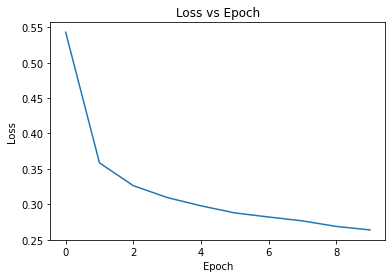

In [23]:
#make a plot for loss

loss_p = df.plot(y='loss', title = 'Loss vs Epoch' , legend = False)
loss_p.set (xlabel = 'Epoch' , ylabel ='Loss')

# Evaluate the model on the test set

In [24]:
#Error : model.evaluate(test_images, test_labels)
# add a dummy channel dimention to the test set
model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3080 - sparse_categorical_accuracy: 0.8897 - mean_absolute_error: 4.4200


[0.3079576790332794, 0.8896999955177307, 4.419997215270996]

In [25]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3080 - sparse_categorical_accuracy: 0.8897 - mean_absolute_error: 4.4200


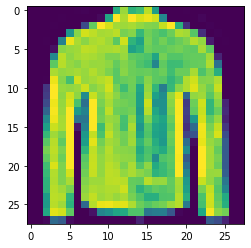

Label: T-shirt/top


In [34]:
#choose a random test image
random_inx = np.random.choice(test_images.shape[0] )
#index image
inx = 50 

test_image_1 = test_images[inx]
plt.imshow(test_image_1)    
plt.show()
print(f'Label: {labels[test_labels[random_inx]]}')                     